In [1]:
from helpers import *
import os
print(os.getcwd())

/home/workspace/2022.micro.artifact/experiments-maggie


In [2]:
verbose = True
architecture = "/home/workspace/2022.micro.artifact/experiments-maggie/arch.yaml"
architecture2 = "/home/workspace/2022.micro.artifact/experiments-maggie/arch3.yaml"
component = "/home/workspace/2022.micro.artifact/experiments-maggie/compound_components.yaml"
ERT_output_path = "ERT.yaml"
ART_output_path = "ART.yaml"
sparse_opts = "SI-SW.yaml"
workload = "/home/workspace/2022.micro.artifact/experiments-maggie/L07.yaml"
mapper = "/home/workspace/2022.micro.artifact/experiments-maggie/mapper.yaml"
mapping = "/home/workspace/2022.micro.artifact/experiments-maggie/timeloop_temp/timeloop-mapper.map.yaml"
constraints = "/home/workspace/2022.micro.artifact/experiments-maggie/constraints.yaml"

In [3]:
# Run Accelergy with the provided arguments
result = run_accelergy(
    architecture_yaml=architecture,
    component_yaml=component,
    ERT_output_path=ERT_output_path,
    ART_output_path=ART_output_path
)

print(f"Generated ERT file: {result['ERT']}")
print(f"Generated ART file: {result['ART']}")

Running Accelergy command: accelergy /home/workspace/2022.micro.artifact/experiments-maggie/arch.yaml /home/workspace/2022.micro.artifact/experiments-maggie/compound_components.yaml -o accelergy_temp -v 1
    _                _                      
   / \   ___ ___ ___| | ___ _ __ __ _ _   _ 
  / _ \ / __/ __/ _ \ |/ _ \ '__/ _` | | | |
 / ___ \ (_| (_|  __/ |  __/ | | (_| | |_| |
/_/   \_\___\___\___|_|\___|_|  \__, |\__, |
                                |___/ |___/ 

Info: generating outputs according to the following specified output flags... 
 Please use the -f flag to update the preference (default to all output files) 
{'ERT': 1, 'ERT_summary': 1, 'ART': 1, 'ART_summary': 1, 'energy_estimation': 1, 'flattened_arch': 1}
Info: config file located: /home/workspace/.config/accelergy/accelergy_config.yaml 
config file content: 
 {'version': 0.3, 'compound_components': [], 'estimator_plug_ins': ['/usr/local/share/accelergy/estimation_plug_ins'], 'primitive_components': ['/usr/local/s

FileNotFoundError: ERT file was not generated by Accelergy

In [4]:
# If you want mapper
# Run Timeloop mapper with the provided arguments
result = run_timeloop_mapper(
    architecture_yaml=architecture,
    workload=workload,
    sparse_opts=sparse_opts,
    ERT=ERT_output_path,
    ART=ART_output_path,
    output_mapping_path="searched_mapping.yaml",
    mapper=mapper,
    constraints=constraints
)

mapping_path = result["best_mapping"]
print(mapping_path)

['timeloop-mapper', '/home/workspace/2022.micro.artifact/experiments-maggie/arch.yaml', '/home/workspace/2022.micro.artifact/experiments-maggie/L07.yaml', 'SI-SW.yaml', '/home/workspace/2022.micro.artifact/experiments-maggie/constraints.yaml', '/home/workspace/2022.micro.artifact/experiments-maggie/mapper.yaml', '--ERT', 'ERT.yaml', '--ART', 'ART.yaml', '-o', 'timeloop_temp']
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
Found Accelergy ERT (energy reference table), replacing internal energy model.
Found Accelergy ART (area reference table), replacing internal area model.
Architecture configuration complete.
Sparse optimization configuration complete.
Using threads = 8
Mapper configuration complete.
Initializing Index Factorization subspac

Interrupt caught. Mapper threads will terminate after completing any ongoing evaluations.
[  1] STATEMENT: global termination flag activated, terminating search.


KeyboardInterrupt: 

In [3]:
# If you already have mapping
output_path = run_timeloop(
    arch_yaml=architecture,
    workload=workload,
    sparse_opts=sparse_opts,
    mapping=mapping_path,
    constraints=constraints,
    mapper=mapper,
    ert_path=ERT_output_path,
    art_path=ART_output_path,
    output_dir="timeloop_output_test_3"
)

NameError: name 'mapping_path' is not defined

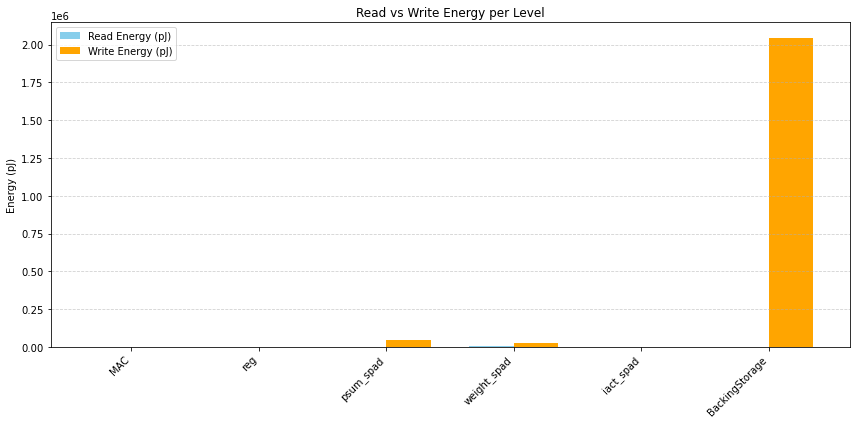

In [10]:
# Plot output
output = parse_timeloop_stats("timeloop_output_test_3/timeloop-model.map+stats.xml")
plot_read_write_energy(output["energy_breakdown_pJ"])

In [3]:
# Run Accelergy with the provided arguments
result = run_accelergy(
    architecture_yaml=architecture2,
    component_yaml=component,
    ERT_output_path=ERT_output_path,
    ART_output_path=ART_output_path
)

print(f"Generated ERT file: {result['ERT']}")
print(f"Generated ART file: {result['ART']}")

Running Accelergy command: accelergy /home/workspace/2022.micro.artifact/experiments-maggie/arch3.yaml /home/workspace/2022.micro.artifact/experiments-maggie/compound_components.yaml -o accelergy_temp -v 1
    _                _                      
   / \   ___ ___ ___| | ___ _ __ __ _ _   _ 
  / _ \ / __/ __/ _ \ |/ _ \ '__/ _` | | | |
 / ___ \ (_| (_|  __/ |  __/ | | (_| | |_| |
/_/   \_\___\___\___|_|\___|_|  \__, |\__, |
                                |___/ |___/ 

Info: generating outputs according to the following specified output flags... 
 Please use the -f flag to update the preference (default to all output files) 
{'ERT': 1, 'ERT_summary': 1, 'ART': 1, 'ART_summary': 1, 'energy_estimation': 1, 'flattened_arch': 1}
Info: config file located: /home/workspace/.config/accelergy/accelergy_config.yaml 
config file content: 
 {'version': 0.3, 'compound_components': [], 'estimator_plug_ins': ['/usr/local/share/accelergy/estimation_plug_ins'], 'primitive_components': ['/usr/local/

In [4]:
# If you want mapper
# Run Timeloop mapper with the provided arguments
result = run_timeloop_mapper(
    architecture_yaml=architecture2,
    workload=workload,
    sparse_opts=sparse_opts,
    ERT=ERT_output_path,
    ART=ART_output_path,
    output_mapping_path="searched_mapping.yaml",
    mapper=mapper,
    constraints=constraints
)

mapping_path = result["best_mapping"]

['timeloop-mapper', '/home/workspace/2022.micro.artifact/experiments-maggie/arch3.yaml', '/home/workspace/2022.micro.artifact/experiments-maggie/L07.yaml', 'SI-SW.yaml', '/home/workspace/2022.micro.artifact/experiments-maggie/constraints.yaml', '/home/workspace/2022.micro.artifact/experiments-maggie/mapper.yaml', '--ERT', 'ERT.yaml', '--ART', 'ART.yaml', '-o', 'timeloop_temp']
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
Found Accelergy ERT (energy reference table), replacing internal energy model.
Found Accelergy ART (area reference table), replacing internal area model.
Architecture configuration complete.
Sparse optimization configuration complete.
Using threads = 16
Mapper configuration complete.
Initializing Index Factorization subsp

[  9] Utilization = 1.00 | pJ/Algorithmic-Compute =  123.847 | pJ/Compute = 259725786.585 | L4[WIO] E2 - L3[] F4 - L2[] E2 - L1[] F8 E2 - L0[] M64 C64 E4 
[ 14] Utilization = 1.00 | pJ/Algorithmic-Compute =  123.847 | pJ/Compute = 259725786.585 | L4[WIO] E2 - L3[] F4 - L2[] E4 - L1[] F8 E2 - L0[] M64 C64 E2 
[  6] Utilization = 1.00 | pJ/Algorithmic-Compute =  123.847 | pJ/Compute = 259725786.585 | L4[WIO] E2 - L3[] F4 - L2[] G1 - L1[] F8 E4 - L0[] M64 C64 E4 
[  7] Utilization = 1.00 | pJ/Algorithmic-Compute =  123.847 | pJ/Compute = 259725786.585 | L4[WIO] E2 - L3[] F4 - L2[] G1 - L1[] F8 E8 - L0[] M64 C64 E2 
[ 10] Utilization = 1.00 | pJ/Algorithmic-Compute =  123.847 | pJ/Compute = 259725786.585 | L4[WIO] E2 - L3[] F4 - L2[] E2 - L1[] F8 E4 - L0[] M64 C64 E2 
[  8] Utilization = 1.00 | pJ/Algorithmic-Compute =  123.847 | pJ/Compute = 259725786.585 | L4[WIO] E2 - L3[] F4 - L2[] E2 - L1[] F8 - L0[] M64 C64 E8 
[ 12] Utilization = 1.00 | pJ/Algorithmic-Compute =  123.847 | pJ/Compute


               BEGIN DIAGNOSTICS               
-----------------------------------------------
-----------------------------------------------
                 END DIAGNOSTICS               


Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Algorithmic-Compute =  123.847 | pJ/Compute = 259725786.585


In [5]:
# If you already have mapping
mapping_path = "/home/workspace/2022.micro.artifact/experiments-maggie/custom_mapping.yaml"
output_path = run_timeloop(
    arch_yaml=architecture2,
    workload=workload,
    sparse_opts=sparse_opts,
    mapping=mapping_path,
    constraints=constraints,
    mapper=mapper,
    ert_path=ERT_output_path,
    art_path=ART_output_path,
    output_dir="timeloop_output_test_3"
)

Running Timeloop:
timeloop-model /home/workspace/2022.micro.artifact/experiments-maggie/arch2.yaml /home/workspace/2022.micro.artifact/experiments-maggie/L07.yaml /home/workspace/2022.micro.artifact/experiments-maggie/custom_mapping.yaml SI-SW.yaml --ERT ERT.yaml --ART ART.yaml -o timeloop_output_test_3
Timeloop failed!
ERROR: target storage level not found: MAC



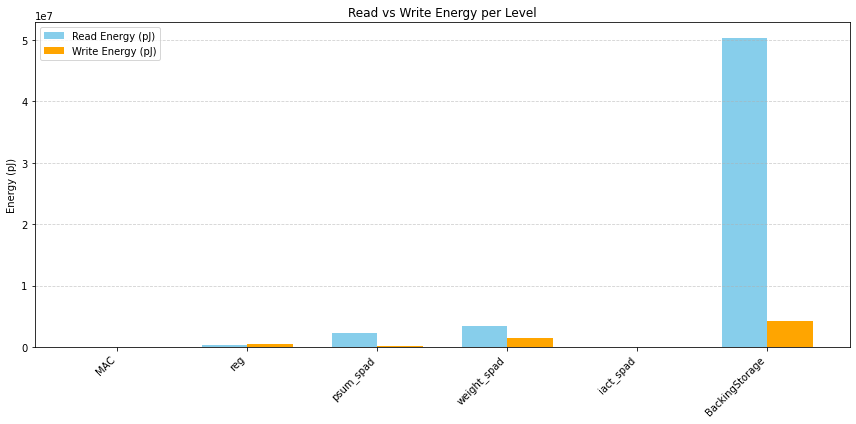

In [5]:
# Plot output
output = parse_timeloop_stats("timeloop_output_test_3/timeloop-model.map+stats.xml")
plot_read_write_energy(output["energy_breakdown_pJ"])